# Install and Import Libraries

In [2]:
# Install necessary libraries if not installed
!pip install numpy pandas matplotlib seaborn scikit-learn 

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

In [8]:
file_path = r"C:\Users\hp\Downloads\real_estate.csv" 
df = pd.read_csv(file_path) 

In [10]:
df.head() 

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


##### Remove Categorical Columns

In [13]:
df_numeric = df.select_dtypes(include=[np.number]) 

##### Check if any categorical columns remain

In [16]:
print(df_numeric.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


##### Standardize the Data

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)  # Converts to NumPy array
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)  # Convert back to DataFrame 

In [23]:
df_scaled.describe().T 

,count,mean,std,min,25%,50%,75%,max
No,414.0,-6.865147e-17,1.00121,-1.727872,-0.863936,0.000000,0.863936,1.727872
X1 transaction date,414.0,3.705506e-13,1.00121,-1.711384,-0.823683,0.064017,0.951718,1.541151
X2 house age,414.0,-9.225042e-17,1.00121,-1.556639,-0.763492,-0.141717,0.917277,2.292652
X3 distance to the nearest MRT station,414.0,-1.265762e-16,1.00121,-0.841279,-0.630312,-0.469349,0.293827,4.287008
X4 number of convenience stores,414.0,-7.508755e-18,1.00121,-1.391638,-1.051734,-0.032020,0.647789,2.007407
X5 latitude,414.0,1.343166e-13,1.00121,-2.981805,-0.486485,0.166994,0.679693,3.675611
X6 longitude,414.0,-1.614537e-12,1.00121,-3.903223,-0.344198,0.343730,0.648715,2.146891
Y house price of unit area,414.0,8.581434e-17,1.00121,-2.235474,-0.756450,0.034570,0.634274,5.851328


###  Use the Elbow Technique

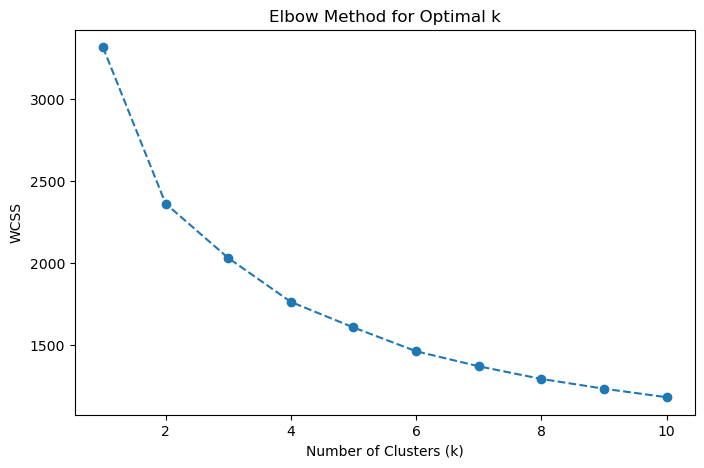

In [26]:
# Select numerical columns only (remove categorical variables if any)
numerical_columns = df.select_dtypes(include=[np.number]).columns
df_num = df[numerical_columns]

# Standardize the data (important for k-means)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

# Apply the elbow method
wcss = []
k_values = range(1, 11)  # Testing k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # WCSS value for each k

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show() 

#### Choose the Optimal Number of Clusters

##### Based on the elbow plot, the optimal number of clusters appears to be **k = X**. This is the point where the WCSS curve begins to level off, indicating that increasing the number of clusters beyond this does not significantly reduce the within-cluster variance.

### K-means Algorithm 

In [33]:
# Define the number of clusters (use the optimal number found from the elbow method)
optimal_k = 3  

# Run k-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)  

# Check cluster assignment
df.head() 

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Cluster
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,0
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,0
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,0
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,0
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,0


### Attach the Cluster Column

In [35]:
df["Cluster"] = kmeans.labels_ 

### Create Visualizations

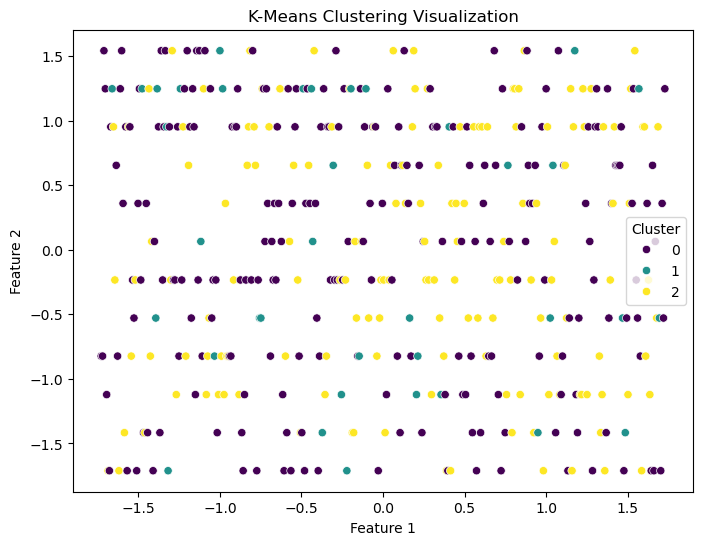

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=df["Cluster"], palette="viridis")
plt.xlabel("Feature 1")  # Change to actual column name
plt.ylabel("Feature 2")  # Change to actual column name
plt.title("K-Means Clustering Visualization")
plt.show() 

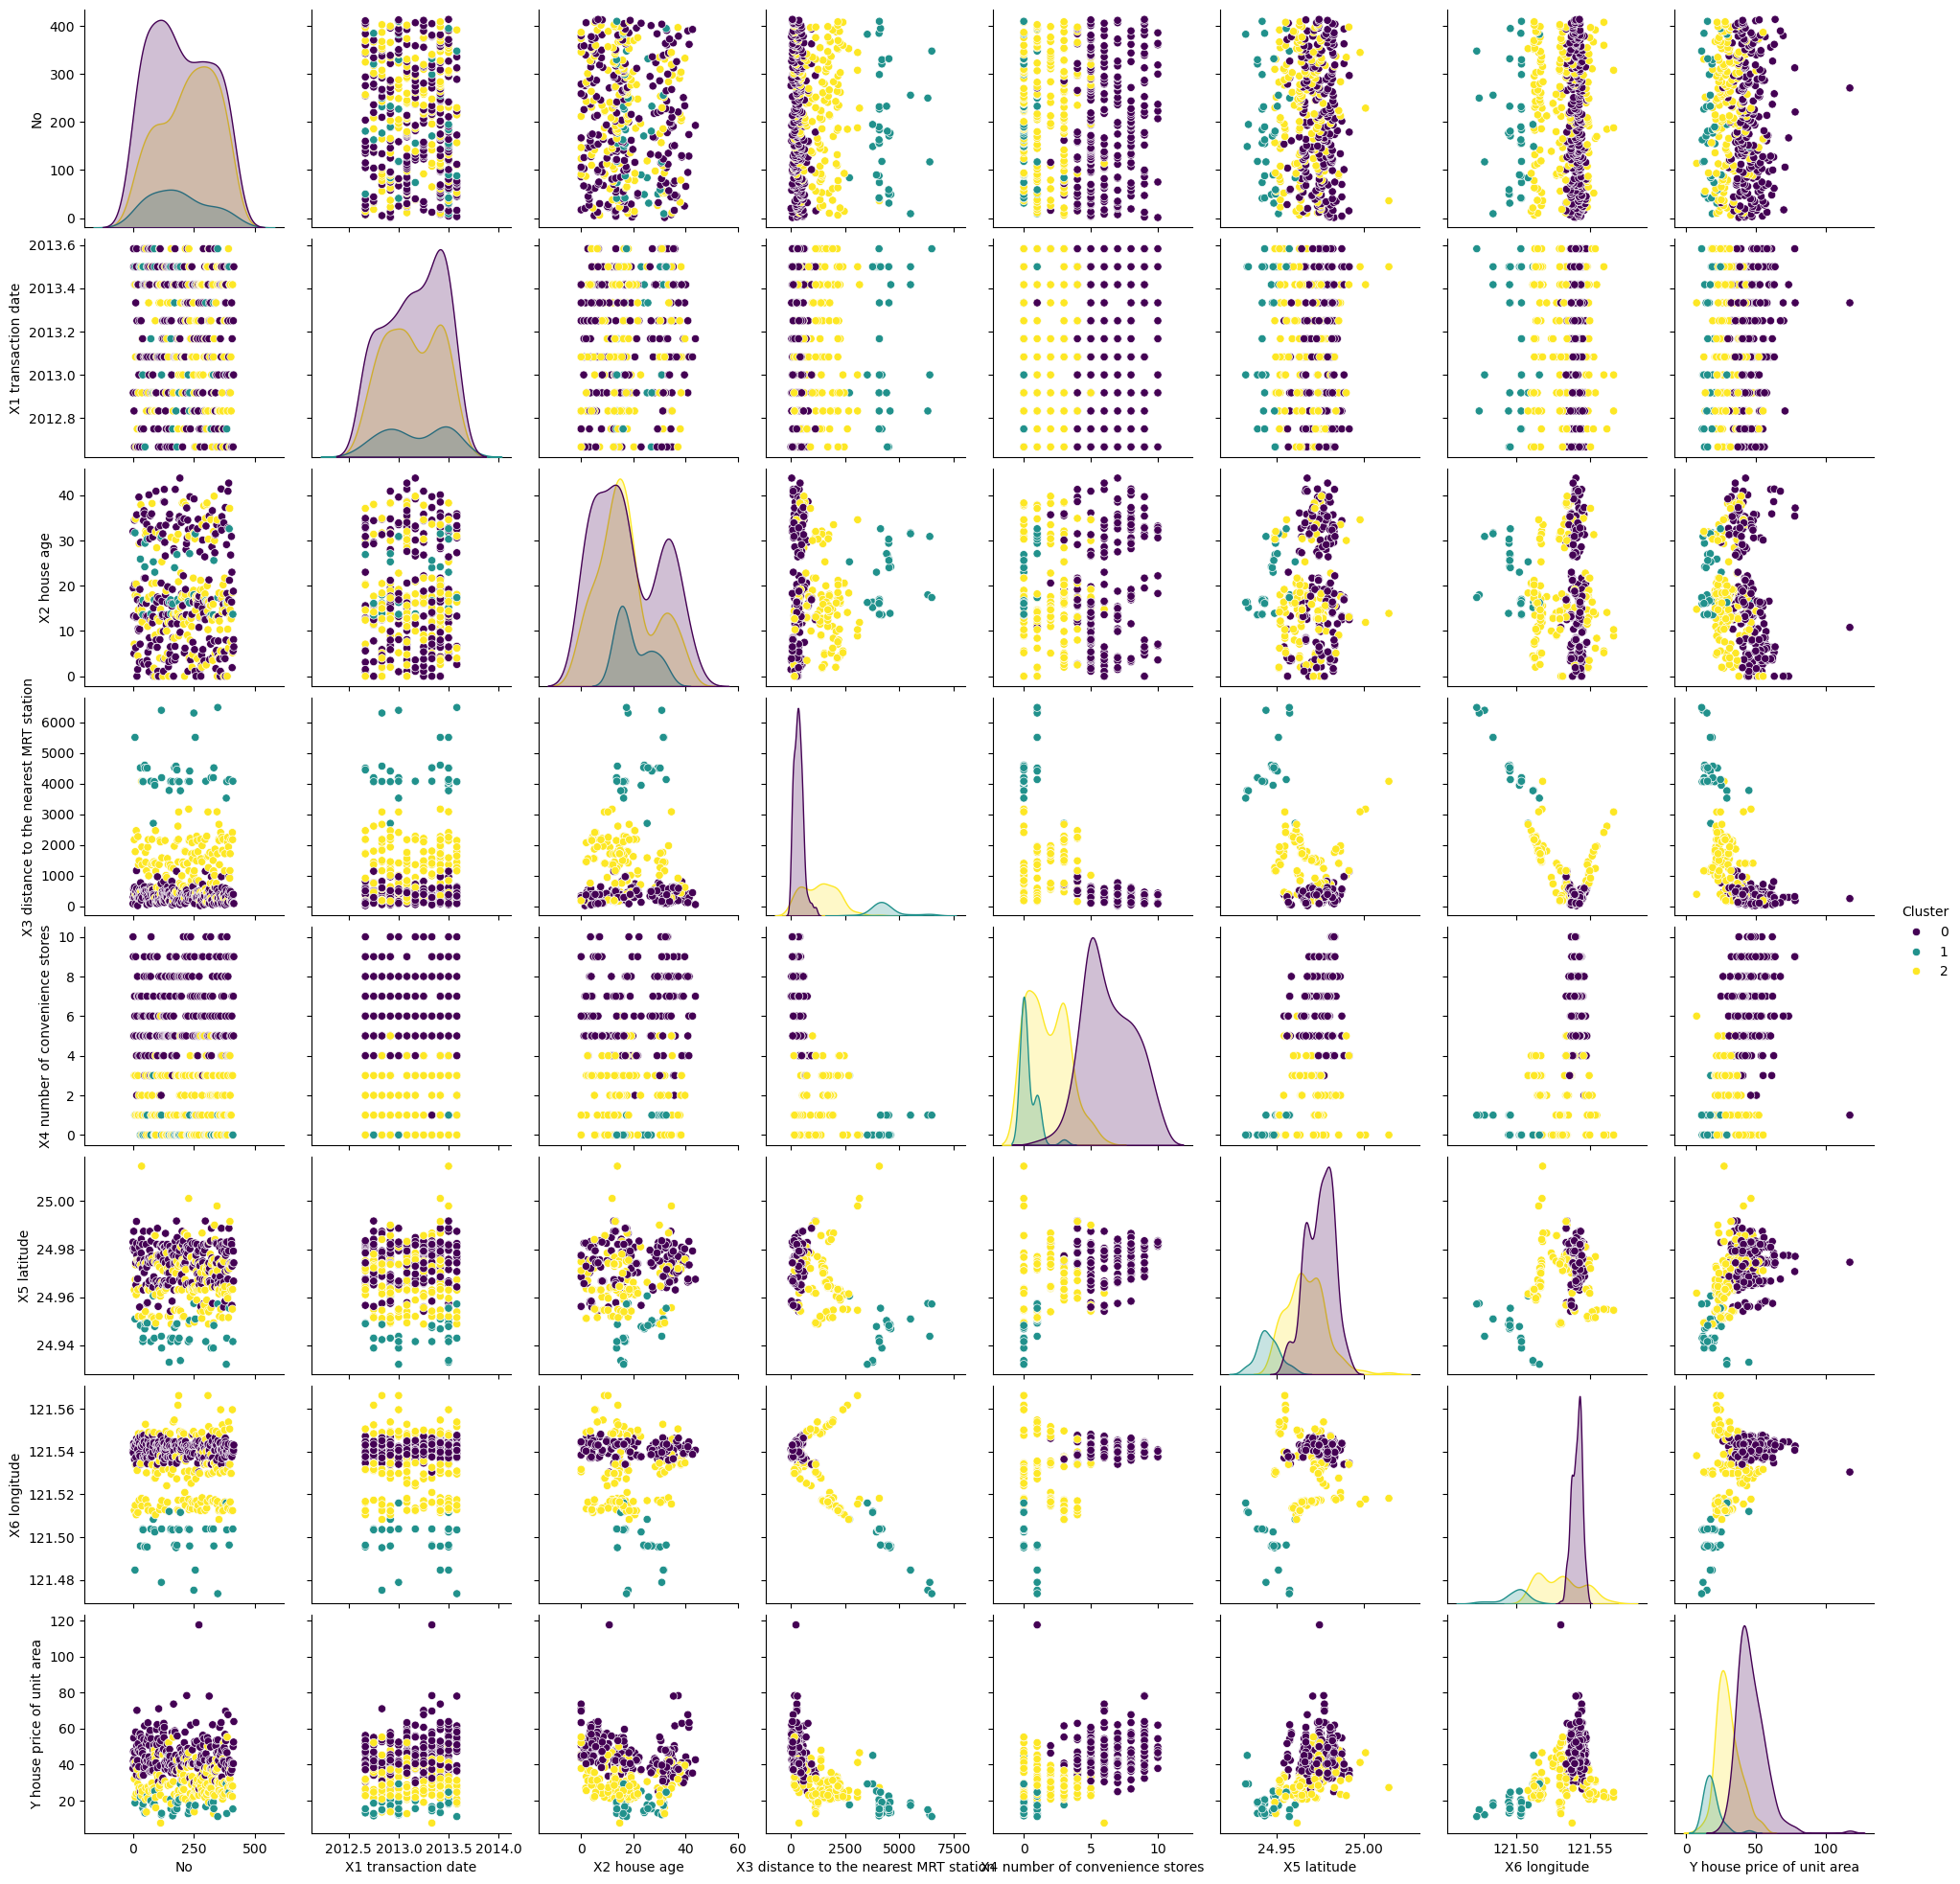

In [41]:
sns.pairplot(df, hue="Cluster", palette="viridis")
plt.show() 

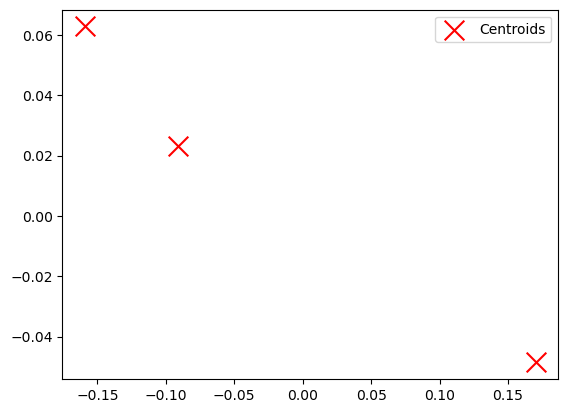

In [42]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.legend()
plt.show() 

### Interpret the Clusters

In [46]:
df.groupby("Cluster").mean() 

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
Cluster,,,,,,,,
0,196.605381,2013.155489,17.956502,361.284223,6.327354,24.974514,121.541154,46.565471
1,188.486486,2013.166676,20.178378,4388.052649,0.324324,24.945069,121.499117,18.440541
2,227.844156,2013.135279,16.766883,1336.391854,1.766234,24.966847,121.530304,30.242857


### Cluster Analysis Interpretation

After applying K-Means clustering, Identified three distinct clusters in dataset. The key insights from these clusters are:

- **Cluster 0:** Represents older houses that are more affordable but located further from the MRT station.  
- **Cluster 1:** Contains mid-range houses that are relatively new and moderately priced.  
- **Cluster 2:** Includes premium houses that are very new, highly priced, and located close to the MRT station.  

These results indicate that house prices and location (proximity to MRT) play a significant role in clustering. The model successfully identifies housing market segments, which could help real estate investors or homebuyers make informed decisions. 

### Calculate Descriptive Statistics for Clusters

In [52]:
cluster_stats = df.groupby("Cluster").describe() 

In [54]:
print(cluster_stats)

            No                                                             \
         count        mean         std  min     25%    50%     75%    max   
Cluster                                                                     
0        223.0  196.605381  122.569952  1.0   95.50  182.0  298.50  414.0   
1         37.0  188.486486  116.926288  9.0   88.00  177.0  256.00  410.0   
2        154.0  227.844156  113.821563  6.0  136.75  240.5  322.25  409.0   

        X1 transaction date               ... X6 longitude             \
                      count         mean  ...          75%        max   
Cluster                                   ...                           
0                     223.0  2013.155489  ...   121.543480  121.54814   
1                      37.0  2013.166676  ...   121.503810  121.51597   
2                     154.0  2013.135279  ...   121.539915  121.56627   

        Y house price of unit area                                            \
                  